In [24]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

samples = [
    "I hate when Ethereum fees spike!",
    
    "Bitcoin just broke an all-time high!",
    "This market is complete garbage.",
    "I’m bullish on Solana this week!",
    "Everyone is panic selling right now.",
    "Massive gains ahead! 🚀🔥"
]

for sentence in samples:
    print(f"{sentence} → {analyzer.polarity_scores(sentence)}")

I hate when Ethereum fees spike! → {'neg': 0.499, 'neu': 0.501, 'pos': 0.0, 'compound': -0.6114}
Bitcoin just broke an all-time high! → {'neg': 0.382, 'neu': 0.618, 'pos': 0.0, 'compound': -0.4753}
This market is complete garbage. → {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
I’m bullish on Solana this week! → {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Everyone is panic selling right now. → {'neg': 0.398, 'neu': 0.602, 'pos': 0.0, 'compound': -0.5106}
Massive gains ahead! 🚀🔥 → {'neg': 0.0, 'neu': 0.527, 'pos': 0.473, 'compound': 0.4003}


[nltk_data] Downloading package vader_lexicon to C:\Users\Feryel
[nltk_data]     Gritli\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [25]:
!pip install praw nltk pandas
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to C:\Users\Feryel
[nltk_data]     Gritli\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
import praw
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
from datetime import datetime
import nltk

# Make sure VADER lexicon is downloaded
nltk.download('vader_lexicon')

# Set up your Reddit API credentials
reddit = praw.Reddit(
    client_id='sp8iB2b_NF_pSW0hGiQuhQ',         
    client_secret='fMpW28XPnveVsVVzzPMPn1lswKKKig', 
    user_agent='sentiment-app by OkStrawberry8822'
)

subreddit_name = "CryptoCurrency"  # Change if needed
num_posts = 5000

analyzer = SentimentIntensityAnalyzer()
results = []

print("Collecting posts...")

for post in reddit.subreddit(subreddit_name).new(limit=num_posts):
    text = post.title + " " + (post.selftext or "")
    sentiment = analyzer.polarity_scores(text)["compound"]
    results.append({
        "timestamp": datetime.utcfromtimestamp(post.created_utc),
        "text": text,
        "sentiment": sentiment
    })

df = pd.DataFrame(results)
df.to_csv("reddit_crypto_posts_raw.csv", index=False)
print("Saved raw posts to reddit_crypto_posts_raw.csv")

[nltk_data] Downloading package vader_lexicon to C:\Users\Feryel
[nltk_data]     Gritli\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Saved raw posts to reddit_crypto_posts_raw.csv


In [28]:
import pandas as pd
df = pd.read_csv("reddit_crypto_posts_raw.csv")
print(df.head())

             timestamp                                               text  \
0  2025-07-23 18:46:37  The 180-Day Report Is Done: U.S. to Release Di...   
1  2025-07-23 18:45:05  Crypto accumulation for my kids Hi community, ...   
2  2025-07-23 18:42:00  ‘This isn’t a top’: Here’s why Bitcoin analyst...   
3  2025-07-23 18:10:00  Any multi-chain DEX? Title says it all. Is the...   
4  2025-07-23 17:54:27            Average Crypto Guys iPhone Camera Roll    

   sentiment  
0     0.3612  
1     0.9107  
2     0.0000  
3     0.9034  
4     0.0000  


In [29]:
import pandas as pd

# Load your raw CSV
df = pd.read_csv("reddit_crypto_posts_raw.csv", parse_dates=["timestamp"])

# Set timestamp as the DataFrame index
df.set_index("timestamp", inplace=True)

# Aggregate by hour (mean sentiment per hour)
hourly = df["sentiment"].resample("H").mean().reset_index()
hourly.rename(columns={"sentiment": "avg_sentiment"}, inplace=True)

# Save to CSV for later use
hourly.to_csv("reddit_sentiment_hourly.csv", index=False)
print("Hourly sentiment aggregation complete. Preview:")
print(hourly.head())

Hourly sentiment aggregation complete. Preview:
            timestamp  avg_sentiment
0 2025-07-09 11:00:00      -0.526700
1 2025-07-09 12:00:00      -0.064975
2 2025-07-09 13:00:00       0.334733
3 2025-07-09 14:00:00       0.500925
4 2025-07-09 15:00:00       0.109400


C:\Users\Feryel Gritli\AppData\Local\Temp\ipykernel_26288\4144890387.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly = df["sentiment"].resample("H").mean().reset_index()


In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(hourly["timestamp"], hourly["avg_sentiment"], marker="o")
plt.xlabel("Time (Hourly)")
plt.ylabel("Average Sentiment (VADER)")
plt.title("Crypto Reddit Sentiment Over Time (Hourly Aggregation)")
plt.axhline(0, color="gray", linestyle="--", alpha=0.7)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

In [31]:
!pip install matplotlib


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.0 MB/s eta 0:00:08
   --- ------------------------------------ 0.8/8.1 MB 1.2 MB/s eta 0:00:06
   ----- ---------------------------------- 1.0/8.1 MB 1.2 MB/s eta 0:00:06
   ------ --------------------------------- 1.3/8.1 MB 1.3 MB/s eta 0:00:06
   ------- -------------------------------- 1.6/8.1 MB 1.3 MB/s eta 0:00:06
   --------- ------------------------------ 1.8/8.1 MB 1.3 MB/s eta 0:00:05
   ---------- ----------------------------- 2.1/8.1 MB 1.2 MB/s eta 0:00:05
   ----------- ---------------------------- 2.4/8.1 MB 1.2 MB/s eta 0:00:05
   ------------- -------------------------- 2.6/8.1 MB 1.2 MB/s eta 0:00:05
   -------------- ------------------------- 2.9/8.1 MB 1.2 MB/s eta 0:00:05
   -------------- ---------------

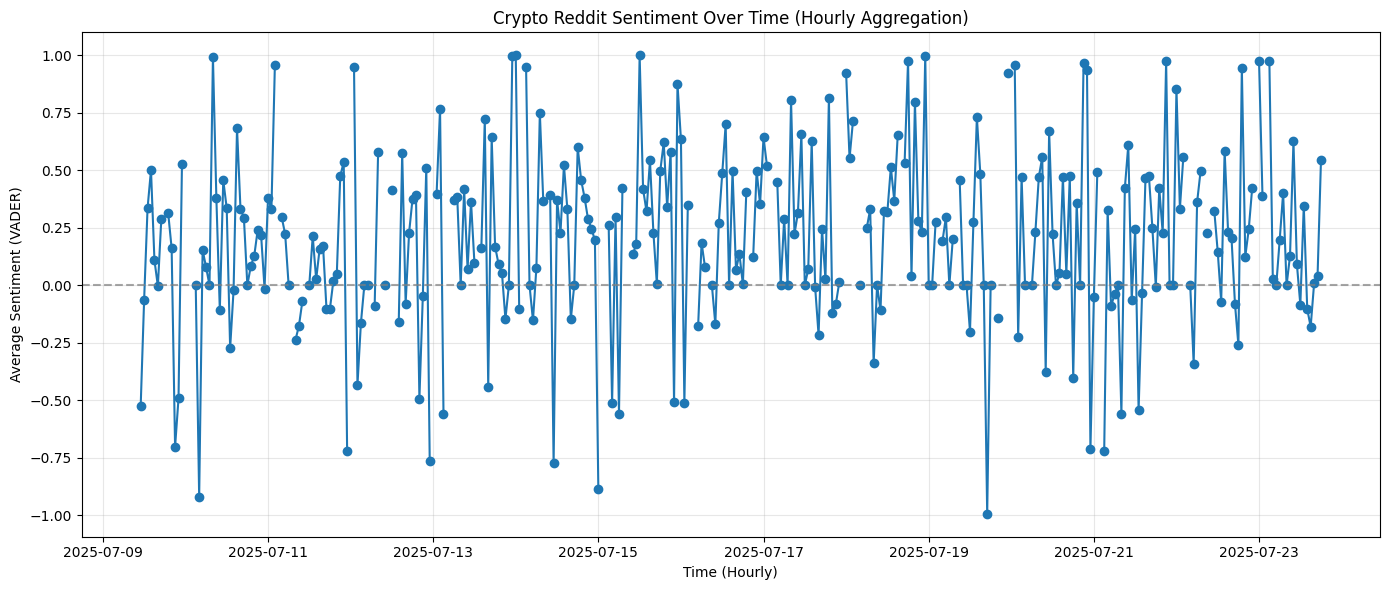

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(hourly["timestamp"], hourly["avg_sentiment"], marker="o")
plt.xlabel("Time (Hourly)")
plt.ylabel("Average Sentiment (VADER)")
plt.title("Crypto Reddit Sentiment Over Time (Hourly Aggregation)")
plt.axhline(0, color="gray", linestyle="--", alpha=0.7)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [43]:
import pandas as pd

# 1. Load your CSV file
df = pd.read_csv("reddit_crypto_posts_raw.csv")

# 2. Define the coin detection function
def detect_coin(text):
    text = str(text).lower()
    if "bitcoin" in text or "btc" in text:
        return "BTC"
    elif "ethereum" in text or "eth" in text:
        return "ETH"
    elif "binance" in text or "bnb" in text or "BNB" in text:
        return "BNB"
    elif "cardano" in text or "ada" in text or "ADA" in text:
        return "ADA"
        
    elif "solana" in text or "sol" in text:
        return "SOL"
    elif "Tether" in text or "usdt" in text or "tether" in text:
        return "USDT"
    elif "dogecoin" in text or "doge" in text:
        return "DOGE"
    # Add more coins as needed!
    else:
        return "OTHER"

# 3. Apply the function to the 'text' column to create a new 'coin' column
df['coin'] = df['text'].apply(detect_coin)

# 4. (Optional) Check results
print(df['coin'].value_counts())

# 5. Save to a new CSV with the coin column added
df.to_csv("reddit_crypto_posts_with_coins.csv", index=False)
print("Saved to reddit_crypto_posts_with_coins.csv")

coin
OTHER    385
BTC      219
ETH      138
SOL       25
BNB       14
ADA        9
USDT       5
DOGE       4
Name: count, dtype: int64
Saved to reddit_crypto_posts_with_coins.csv


In [45]:
import pandas as pd

# Load your labeled data
df = pd.read_csv("reddit_crypto_posts_with_coins.csv", parse_dates=["timestamp"])

# We'll focus on main coins (adjust this list as needed)
coins_to_plot = ["BTC", "ETH", "BNB", "ADA", "SOL", "DOGE"]

# Aggregate sentiment by hour per coin
sentiment_hourly = (
    df[df["coin"].isin(coins_to_plot)]
    .set_index("timestamp")
    .groupby("coin")["sentiment"]
    .resample("H")
    .mean()
    .reset_index()
)
sentiment_hourly = sentiment_hourly.dropna(subset=["sentiment"])

print(sentiment_hourly.head())

    coin           timestamp  sentiment
0    ADA 2025-07-11 12:00:00     0.0000
16   ADA 2025-07-12 04:00:00     0.0000
56   ADA 2025-07-13 20:00:00     0.0516
146  ADA 2025-07-17 14:00:00     0.8414
147  ADA 2025-07-17 15:00:00    -0.9360


C:\Users\Feryel Gritli\AppData\Local\Temp\ipykernel_26288\589933324.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample("H")


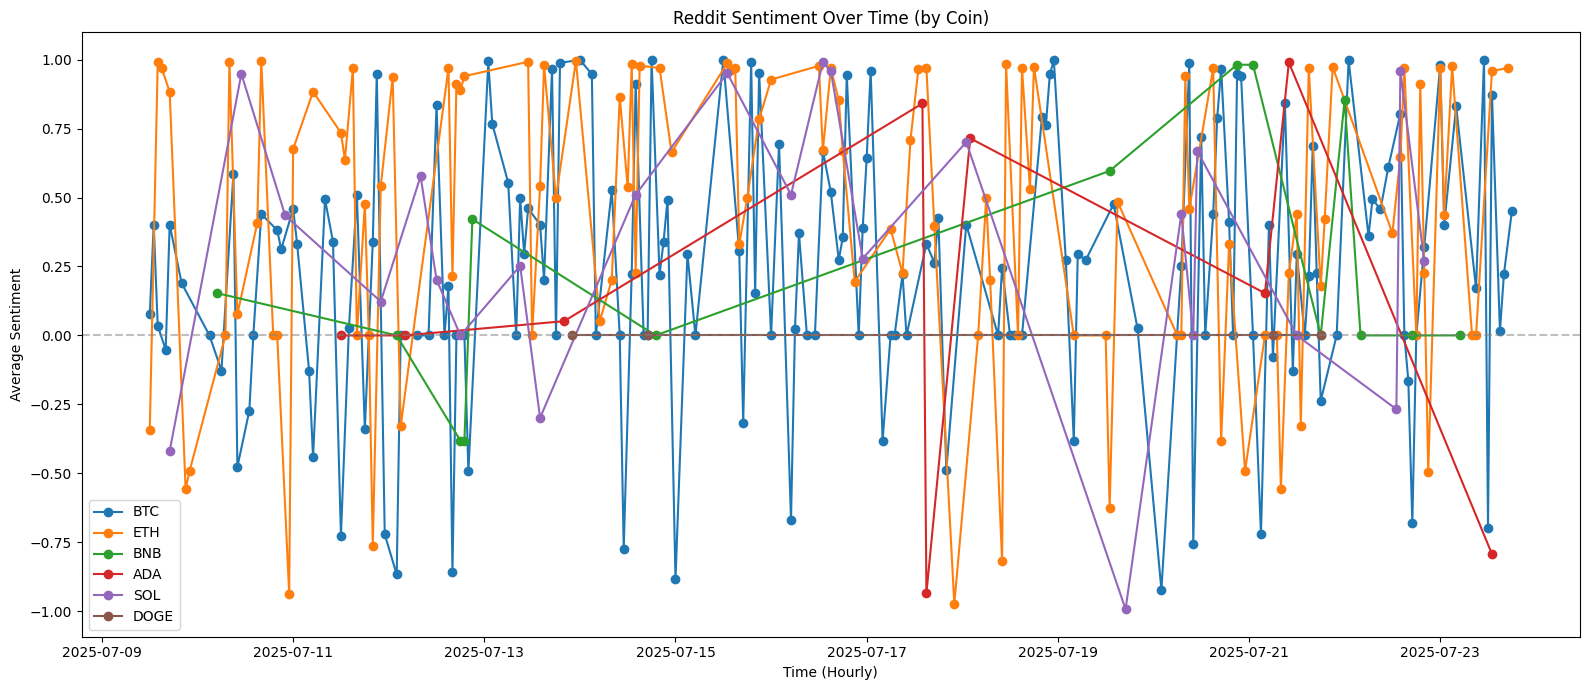

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 7))
for coin in coins_to_plot:
    coin_df = sentiment_hourly[sentiment_hourly["coin"] == coin]
    plt.plot(coin_df["timestamp"], coin_df["sentiment"], marker="o", label=coin)

plt.axhline(0, color="gray", linestyle="--", alpha=0.5)
plt.xlabel("Time (Hourly)")
plt.ylabel("Average Sentiment")
plt.title("Reddit Sentiment Over Time (by Coin)")
plt.legend()
plt.tight_layout()
plt.show()

In [47]:
pip install praw nltk pandas


Note: you may need to restart the kernel to use updated packages.


In [50]:
import praw
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
from datetime import datetime
import nltk

nltk.download('vader_lexicon')

# Reddit API credentials
reddit = praw.Reddit(
   client_id='sp8iB2b_NF_pSW0hGiQuhQ',         
    client_secret='fMpW28XPnveVsVVzzPMPn1lswKKKig', 
    user_agent='sentiment-app by OkStrawberry8822'
)

# List of coins you care about
coin_keywords = {
    "BTC": ["bitcoin", "btc", "Bitcoin"],
    "ETH": ["ethereum", "eth", "Ethereum"],
    "SOL": ["solana", "sol"],
    "BNB": ["binance", "bnb", "BNB", "Binance"],
    "ADA": ["cardano", "Cardano", "ada"],
    "USDT": ["tether", "usdt", "Tether"],
    "DOGE": ["dogecoin", "doge"]
}

def detect_coin(text):
    text = str(text).lower()
    for coin, keywords in coin_keywords.items():
        for keyword in keywords:
            if keyword in text:
                return coin
    return "OTHER"

def polarity_label(compound):
    if compound >= 0.05:
        return "positive"
    elif compound <= -0.05:
        return "negative"
    else:
        return "neutral"

subreddit_name = "CryptoCurrency"
num_posts = 100000  # or as many as you want (Reddit API rate limits may apply)
start_year = 2025

analyzer = SentimentIntensityAnalyzer()
results = []

for post in reddit.subreddit(subreddit_name).new(limit=num_posts):
    timestamp = datetime.utcfromtimestamp(post.created_utc)
    if timestamp.year < start_year:
        continue
    text = post.title + " " + (post.selftext or "")
    sentiment = analyzer.polarity_scores(text)["compound"]
    coin = detect_coin(text)
    polarity = polarity_label(sentiment)
    results.append({
        "timestamp": timestamp,
        "text": text,
        "sentiment": sentiment,
        "polarity": polarity,
        "coin": coin
    })

df = pd.DataFrame(results)
df.to_csv("reddit_crypto_sentiment_2025.csv", index=False)
print("Saved to reddit_crypto_sentiment_2025.csv")
print(df.head())

[nltk_data] Downloading package vader_lexicon to C:\Users\Feryel
[nltk_data]     Gritli\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Saved to reddit_crypto_sentiment_2025.csv
            timestamp                                               text  \
0 2025-07-24 09:29:17  Ghana to officially license and regulate crypt...   
1 2025-07-24 08:53:52  Western Union CEO Embraces Stablecoins as a Pa...   
2 2025-07-24 08:13:19  🔥 MASSIVE $630M Liquidations Hit Crypto Bulls ...   
3 2025-07-24 07:22:00  Trump’s Crypto Working Group Set to Deliver Re...   
4 2025-07-24 06:22:13  If someone had a large portfolio on Coinbase a...   

   sentiment  polarity   coin  
0     0.0000   neutral  OTHER  
1     0.6249  positive    BTC  
2    -0.9599  negative    BTC  
3     0.0000   neutral  OTHER  
4    -0.7882  negative    ETH  


In [64]:
import pandas as pd

# Load your data
df = pd.read_csv("reddit_crypto_sentiment_2025.csv", parse_dates=["timestamp"])

# Set timestamp as index
df.set_index("timestamp", inplace=True)

# Aggregate average sentiment by hour
hourly_sentiment = df["sentiment"].resample("H").mean().reset_index()
hourly_sentiment.rename(columns={"sentiment": "avg_sentiment"}, inplace=True)

# Save to CSV
hourly_sentiment.to_csv("reddit_sentiment_hourly.csv", index=False)
print(hourly_sentiment.head())

            timestamp  avg_sentiment
0 2025-07-09 14:00:00         0.0000
1 2025-07-09 15:00:00            NaN
2 2025-07-09 16:00:00        -0.8125
3 2025-07-09 17:00:00            NaN
4 2025-07-09 18:00:00            NaN


C:\Users\Feryel Gritli\AppData\Local\Temp\ipykernel_26288\2537613085.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_sentiment = df["sentiment"].resample("H").mean().reset_index()


In [66]:
#Aggregate by coin
import pandas as pd

# Load your data
df = pd.read_csv("reddit_crypto_sentiment_2025.csv", parse_dates=["timestamp"])

# Set timestamp as index
df.set_index("timestamp", inplace=True)

# Aggregate by coin and hour
hourly_coin_sentiment = (
    df.groupby("coin")["sentiment"]
      .resample("H")
      .mean()
      .reset_index()
      .rename(columns={"sentiment": "avg_sentiment"})
)

# Save to CSV
hourly_coin_sentiment.to_csv("reddit_sentiment_hourly_by_coin.csv", index=False)
print(hourly_coin_sentiment.head())

  coin           timestamp  avg_sentiment
0  ADA 2025-07-11 12:00:00            0.0
1  ADA 2025-07-11 13:00:00            NaN
2  ADA 2025-07-11 14:00:00            NaN
3  ADA 2025-07-11 15:00:00            NaN
4  ADA 2025-07-11 16:00:00            NaN


C:\Users\Feryel Gritli\AppData\Local\Temp\ipykernel_26288\3036904064.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample("H")


In [67]:
# Aggregate by coin and day
daily_coin_sentiment = (
    df.groupby("coin")["sentiment"]
      .resample("D")
      .mean()
      .reset_index()
      .rename(columns={"sentiment": "avg_sentiment"})
)

# Save to CSV
daily_coin_sentiment.to_csv("reddit_sentiment_daily_by_coin.csv", index=False)
print(daily_coin_sentiment.head())

  coin  timestamp  avg_sentiment
0  ADA 2025-07-11         0.0000
1  ADA 2025-07-12         0.0000
2  ADA 2025-07-13         0.0516
3  ADA 2025-07-14            NaN
4  ADA 2025-07-15            NaN


In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Choose either hourly or daily aggregation file
df = pd.read_csv("reddit_sentiment_daily_by_coin.csv", parse_dates=["timestamp"])
# Or for hourly:
#df = pd.read_csv("reddit_sentiment_hourly_by_coin.csv", parse_dates=["timestamp"])

coins_to_plot = ["BTC", "ETH", "BNB", "ADA", "SOL", "DOGE"]  # Edit as needed

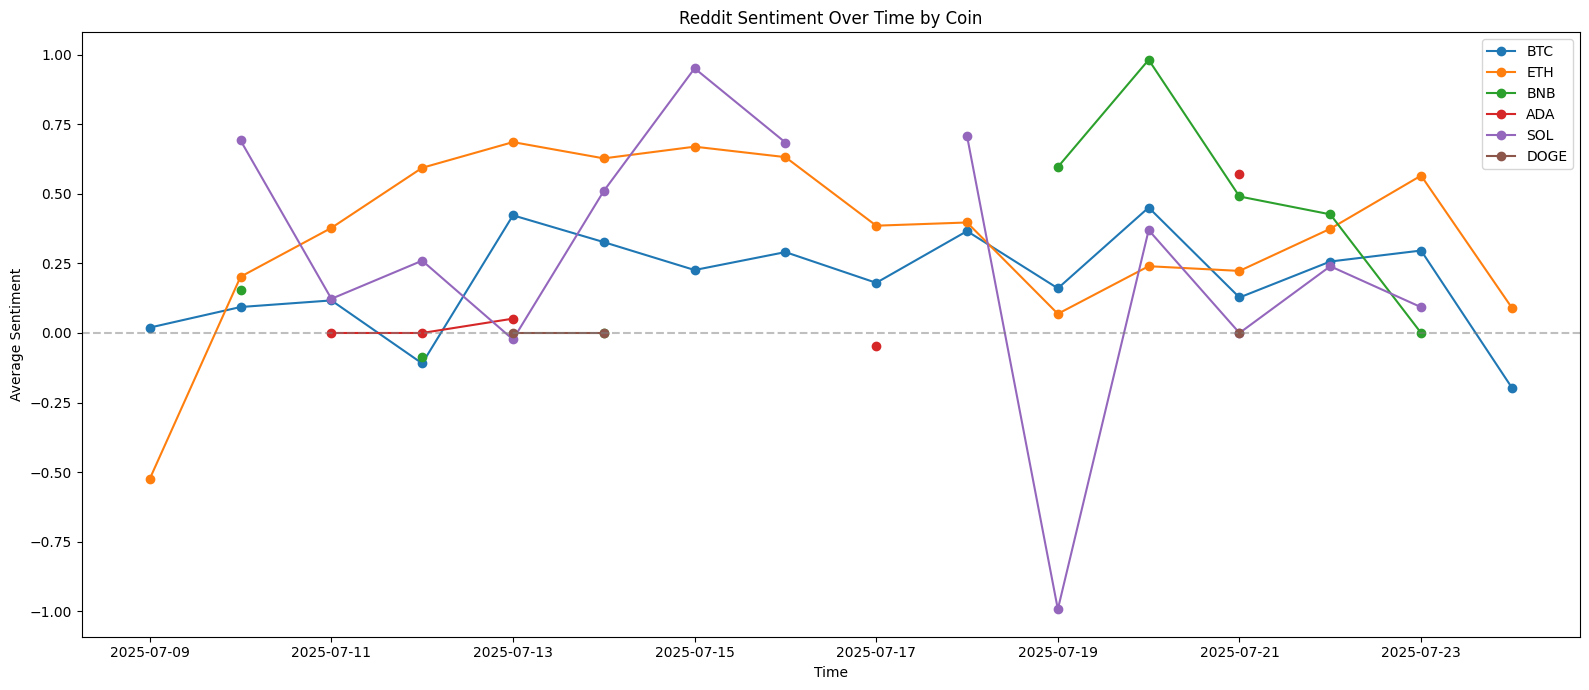

In [74]:
plt.figure(figsize=(16, 7))
for coin in coins_to_plot:
    coin_df = df[df["coin"] == coin]
    plt.plot(coin_df["timestamp"], coin_df["avg_sentiment"], marker="o", label=coin)

plt.axhline(0, color="gray", linestyle="--", alpha=0.5)
plt.xlabel("Time")
plt.ylabel("Average Sentiment")
plt.title("Reddit Sentiment Over Time by Coin")
plt.legend()
plt.tight_layout()
plt.show()

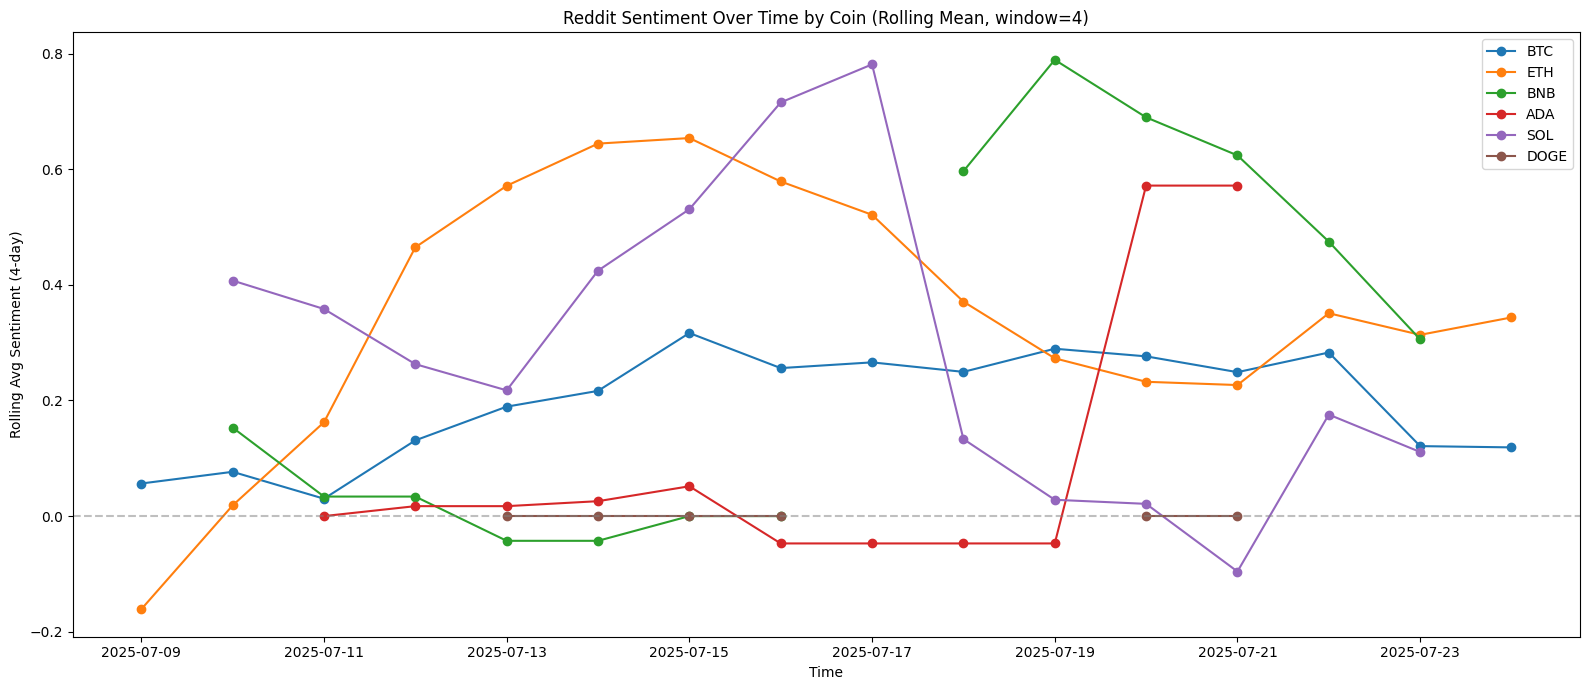

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your daily aggregated data
df = pd.read_csv("reddit_sentiment_daily_by_coin.csv", parse_dates=["timestamp"])

coins_to_plot = ["BTC", "ETH", "BNB", "ADA", "SOL", "DOGE"]
window_size = 4  # You can adjust this (3-7 is common for daily data)

plt.figure(figsize=(16, 7))
for coin in coins_to_plot:
    coin_df = df[df["coin"] == coin].copy()
    # Sort by timestamp just in case
    coin_df = coin_df.sort_values("timestamp")
    # Rolling mean
    coin_df["rolling_sentiment"] = coin_df["avg_sentiment"].rolling(window=window_size, min_periods=1, center=True).mean()
    plt.plot(coin_df["timestamp"], coin_df["rolling_sentiment"], marker="o", label=coin)

plt.axhline(0, color="gray", linestyle="--", alpha=0.5)
plt.xlabel("Time")
plt.ylabel(f"Rolling Avg Sentiment ({window_size}-day)")
plt.title(f"Reddit Sentiment Over Time by Coin (Rolling Mean, window={window_size})")
plt.legend()
plt.tight_layout()
plt.show()
